https://hackernoon.com/logistic-regression-train-model-in-python-and-use-it-on-angular-front-end-u1s3u95

https://stackblitz.com/edit/ms-ng-pub-movie-sentiment-analysis-logistic-regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn import __version__

__version__

'1.5.1'

In [ ]:
# dataset can be found at: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
from urllib import request
from zipfile import ZipFile

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
        
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!')
        
download_file('imdb.zip', 'https://github.com/msaricaumbc/DS_data/blob/master/ds602/imdb2.zip?raw=true')
unzip('imdb.zip')

File Name                                             Modified             Size
imdb.csv                                       2023-04-30 17:41:14     65862309
Extracting all the files now...
Done!


In [3]:
def prepare_dataset():
    df = pd.read_csv('imdb.csv')
    return df

In [4]:
df = prepare_dataset()
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [5]:
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


<Axes: >

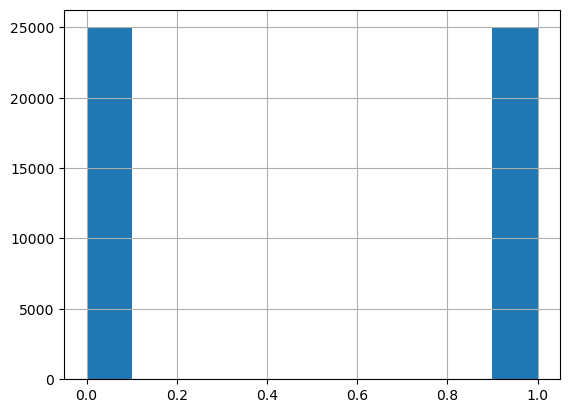

In [6]:
df['sentiment'].hist()

In [7]:
def assertions(model):    
    positives = [
        'this is a great movie',
        'awesome movie'
    ]
        
    negatives = [
        'did not like it',
        'worst movie ever'
    ]
    
    for sentence in positives:
        pred = model.predict([sentence])[0]
        print(sentence, '-->', 'correct' if pred == 1 else 'incorrect')

    for sentence in negatives:
        pred = model.predict([sentence])[0]
        print(sentence, '-->', 'correct' if pred == 0 else 'incorrect')

In [8]:
def create_train_test(df=df):
    X = df['review']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    return X_train, X_test, y_train, y_test

<Axes: >

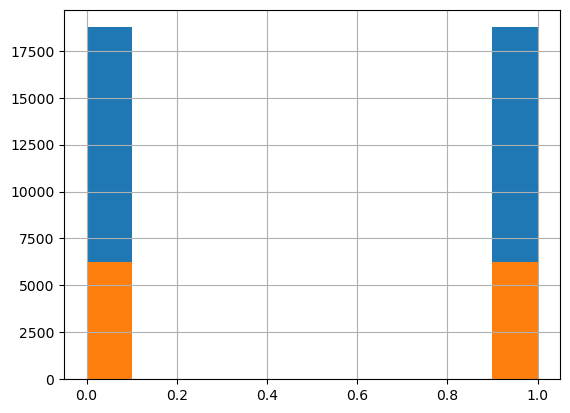

In [9]:
X_train, X_test, y_train, y_test = create_train_test()

y_train.hist()
y_test.hist()

In [10]:
def train_and_test(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    params = {
        'pos_label': 1
    }
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, **params))
    print('Recall:', recall_score(y_test, y_pred, **params))
    print('F1 Score:', f1_score(y_test, y_pred, **params))
    print('-'* 60)
    assertions(model)

In [11]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000, stop_words='english')), 
    ('model', LogisticRegression(solver='liblinear'))
])


train_and_test(pipeline)

Accuracy: 0.88312
Precision: 0.8772455089820359
Recall: 0.890862538006081
F1 Score: 0.8840015879317189
------------------------------------------------------------
this is a great movie --> correct
awesome movie --> correct
did not like it --> correct
worst movie ever --> correct


In [12]:
pipeline.predict(['this is a great movie', 'worst movie ever'])

array([1, 0])

In [13]:
import joblib

def save_model(model, file_name='movie_model.pkl'):
    joblib.dump(model, file_name)

In [14]:
save_model(pipeline)

In [15]:
!ls

consuming_api.ipynb   ml_training.ipynb     server.py
imdb.csv              movie_model.pkl       setting_up_server.txt
imdb.zip              server.ipynb          user-data.txt
